# Posthoc Analysis of IMAGEN:
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

<br>
Such in-depth understanding can be achieved by performing follow-up analysis:

In [1]:
import math
import time
import parmap
import pickle
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from imagen_posthocloader import *
from plot_results_posthoc import *

In [2]:
num_cores = multiprocessing.cpu_count()
print(f'Available CPU cores: {num_cores}')
num_cores = math.floor(num_cores/3)
print(f'Set CPU cores: {num_cores}')

Available CPU cores: 48
Set CPU cores: 16


In [3]:
DATA_DIR = "/ritter/share/data/IMAGEN"
posthoc = IMAGEN_posthoc()

# 4. Visualization SHAP
## 4.1. SHAP values

### 4.1.1. Load the data and model

<b> Load the model </b>

In [4]:
MODELS = posthoc.get_model("../../results/newlbls-clean-fu3-espad-fu3-19a-binge-*/*/")

<b> Load the data </b>

In [5]:
# train_dir = "newlbls-clean-fu3-espad-fu3-19a-binge-n650.h5"
# # load the training data
# tr_X, tr_X_col_names, tr_list = SHAP.get_train_data(train_dir, group=True)
# print(f"Training dataset: {tr_X.shape}, {len(tr_X_col_names)}, {tr_list[0].shape}")

holdout_dir = "newholdout-clean-fu3-espad-fu3-19a-binge-n102.h5"
# load the holdout data
ho_X, ho_X_col_names, ho_list = posthoc.get_holdout_data(holdout_dir, group=True)
# print(f"Holdout dataset: {ho_X.shape}, {len(ho_X_col_names)}, "
#       f"{ho_list[0].shape}, {ho_list[1].shape}")

<b> Get the SHAP input list </b>

In [6]:
# # generate the SHAP input list of the training
# tr_INPUT = SHAP.get_list(MODELS, tr_X)
# generate the SHAP input list of the holdout
ho_INPUT = posthoc.get_list(MODELS, ho_X)
# print(f"Number of training set: {len(tr_INPUT)}\n\n" # , One example: {tr_INPUT[0:1]}\n\n"
print(f"Number of holdout set: {len(ho_INPUT)}") # , One example: {tr_INPUT[0:1]}")

Number of holdout set: 28


### 4.1.2. Get the shap value

<b> One by one

In [7]:
# # One by one
# INPUT = tr_INPUT[0]
# start_time = time.time()
# _ = SHAP.get_SHAP(INPUT)
# print("--- %s seconds ---" % (time.time() - start_time))

<b> Multi processing </b>

In [8]:
# # Hodlout: Multi processing
# INPUT = ho_INPUT
# start_time = time.time()
# _ = parmap.map(SHAP.get_SHAP, INPUT, pm_pbar=True, pm_processes=num_cores)
# print("--- %s seconds ---" % (time.time() - start_time))

### 4.1.3. Get the plot

<b> Load the dataset </b>

In [9]:
file = '/ritter/share/data/IMAGEN/posthoc/explainers/SVM-rbf0_multi.sav'
with open(file, 'rb') as fp:
    load_shap_values = pickle.load(fp)
if not os.path.isdir("figures"):
    os.makedirs("figures")

In [10]:
X = ho_X
X_col_names = ho_X_col_names

In [11]:
# for i, Col in enumerate(X_col_names):
#     print(i, Col)

In [12]:
# for model_name in MODELS:
#     if ( model_name.upper() not in MODEL):
#         print("skipping model {}".format(model_name))
#         continue
#     print("generating SHAP values for model = {} ..".format(model_name))
#     for i, model in enumerate(MODELS[model_name]):
#         if i!=0:
#             print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
#             continue
#         if i==0:
#             # 1. summary bar plot of feature importnace
#             shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="bar", show=False)
#             plt.title(model_name+": "+str(i))
#             plt.savefig(f"figures/{model_name}{i}_holdout_bar.pdf", bbox_inches='tight')

<b> ROI 01: swarm plot showing shap values vs feature values ordered by feature importance </b>

Text(0.5, 1.0, 'SVM-rbf0 holdout')

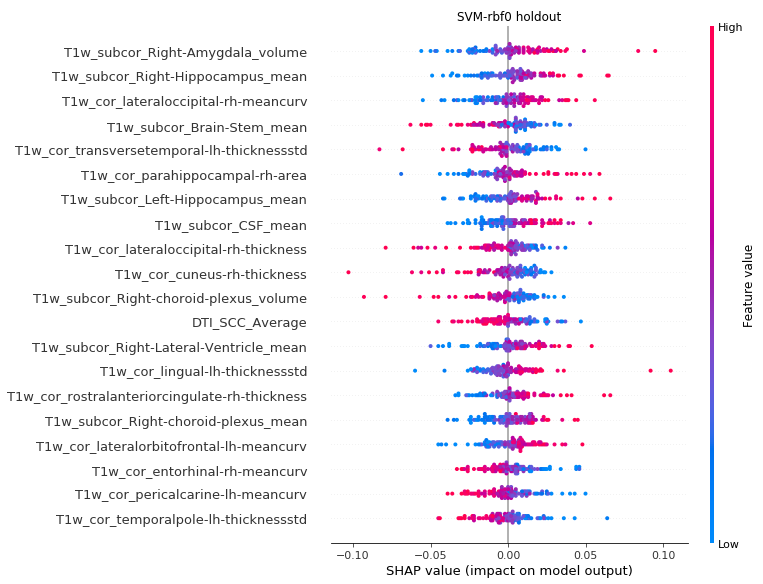

In [13]:
shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="dot", show=False)
plt.title("SVM-rbf0 holdout")

In [14]:
# for model_name in MODELS:
#     if ( model_name.upper() not in MODEL):
#         print("skipping model {}".format(model_name))
#         continue
#     print("generating SHAP values for model = {} ..".format(model_name))
#     for i, model in enumerate(MODELS[model_name]):
#         if i!=0:
#             print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
#             continue
#         if i==0:
#             # 2. swarm plot showing shap values vs feature values ordered by feature importance
#             shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="dot", show=False)
#             plt.title(model_name+": "+str(i))
#             plt.savefig(f"figures/{model_name}{i}_holdout_swarm.pdf", bbox_inches='tight')

<b> ROI 02: Class difference plot showing shap values vs feature values ordered by feature importance </b>

In [15]:
X_col_names = ho_X_col_names
class_mask = ho_list[3].astype(bool)

Text(0.5, 1.0, 'SVM-rbf0 holdout')

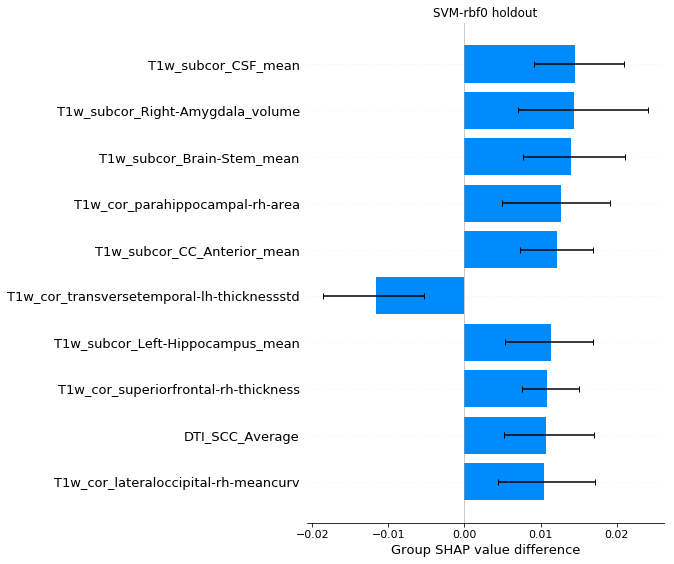

In [16]:
shap.group_difference_plot(load_shap_values.values, group_mask=class_mask, feature_names=X_col_names, show=False, max_display=10)
plt.title("SVM-rbf0 holdout")

In [17]:
# for model_name in MODELS:
#     if ( model_name.upper() not in MODEL):
#         print("skipping model {}".format(model_name))
#         continue
#     print("generating SHAP values for model = {} ..".format(model_name))
#     for i, model in enumerate(MODELS[model_name]):
#         if i!=0:
#             print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
#             continue
#         if i==0:
#             # 3. sex difference plot
#             shap.group_difference_plot(load_shap_values.values, group_mask=class_mask, feature_names=X_col_names, show=False, max_display=10)
#             plt.title(model_name+":"+str(i))
#             # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
#             plt.savefig(f"figures/{model_name}{i}_holdout_bar-classdiff.pdf", bbox_inches='tight')

<b> ROI 03: Sex difference plot showing shap values vs feature values ordered by feature importance </b>

In [18]:
X_col_names = ho_X_col_names
sex_mask = ho_list[2].astype(bool)

Text(0.5, 1.0, 'SVM-rbf0 holdout')

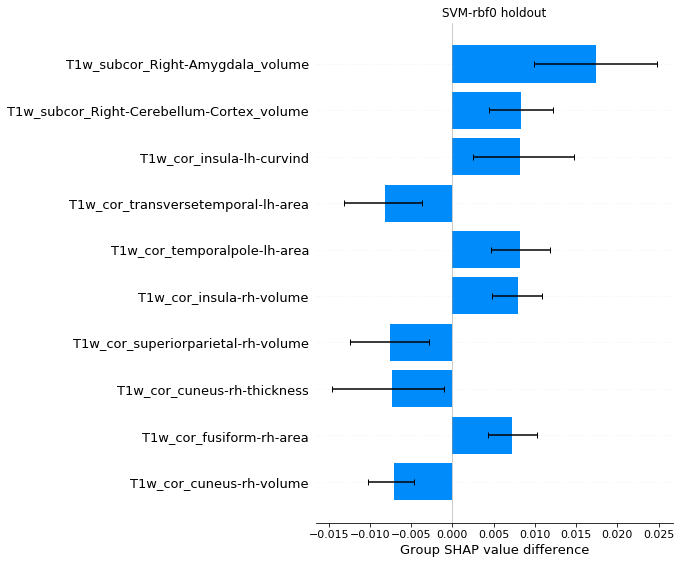

In [19]:
shap.group_difference_plot(load_shap_values.values, group_mask=sex_mask, feature_names=X_col_names, show=False, max_display=10)
plt.title("SVM-rbf0 holdout")

In [20]:
# for model_name in MODELS:
#     if ( model_name.upper() not in MODEL):
#         print("skipping model {}".format(model_name))
#         continue
#     print("generating SHAP values for model = {} ..".format(model_name))
#     for i, model in enumerate(MODELS[model_name]):
#         if i!=0:
#             print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
#             continue
#         if i==0:
#             # 3. sex difference plot
#             shap.group_difference_plot(load_shap_values.values, group_mask=sex_mask, feature_names=X_col_names, show=False, max_display=10)
#             plt.title(model_name+":"+str(i))
#             # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
#             plt.savefig(f"figures/{model_name}{i}_holdout_bar-sexdiff.pdf", bbox_inches='tight')

<b> ROI 04: summary bar plot of feature importnace </b>

Text(0.5, 1.0, 'SVM-rbf0 holdout')

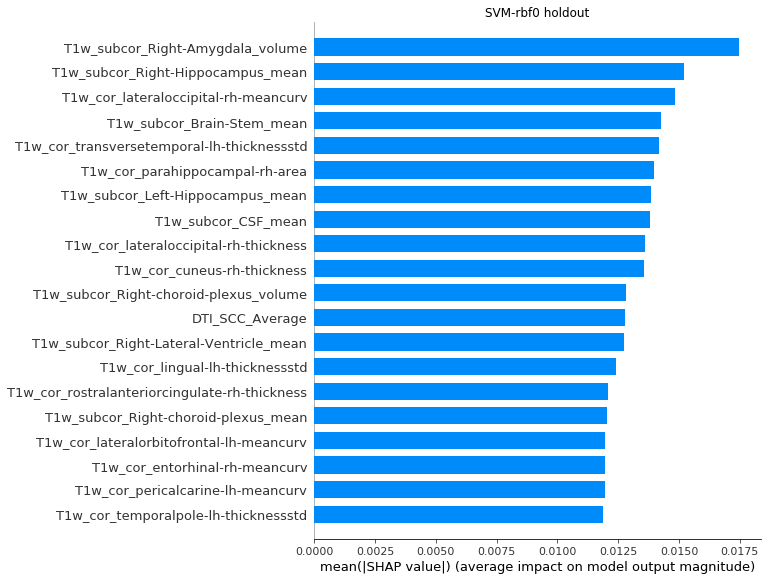

In [21]:
shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="bar", show=False)
plt.title("SVM-rbf0 holdout")

### 4.1.4. Distribution sorted by descending oder of mean|SHAP value| in SVM-rbf

<b>Load the SHAP</b>

In [25]:
SHAP_SVM_rbf = posthoc.read_SHAP('IMAGEN_SHAP_SVM_rbf.csv')
SHAP = posthoc.read_SHAP('all_mean_SHAP.csv')

In [26]:
SHAP_SVM_rbf.loc[143]

SVM rbf0 name                   T1w_cor_parstriangularis-rh-gauscurv
SVM rbf1 name                                      DTI_UNC-L_Average
SVM rbf2 name                T1w_cor_lateralorbitofrontal-rh-curvind
SVM rbf3 name                     T1w_cor_supramarginal-rh-thickness
SVM rbf4 name                    T1w_cor_lateraloccipital-rh-curvind
SVM rbf5 name           T1w_cor_rostralanteriorcingulate-lh-meancurv
SVM rbf6 name                  T1w_cor_transversetemporal-rh-curvind
sorted SVM rbf0 mean                                      0.00685294
sorted SVM rbf1 mean                                      0.00654902
sorted SVM rbf2 mean                                      0.00682353
sorted SVM rbf3 mean                                      0.00702941
sorted SVM rbf4 mean                                      0.00737255
sorted SVM rbf5 mean                                      0.00739216
sorted SVM rbf6 mean                                       0.0057451
sorted SVM rbf0 std               

<b>mean|SHAP| distribution</b>

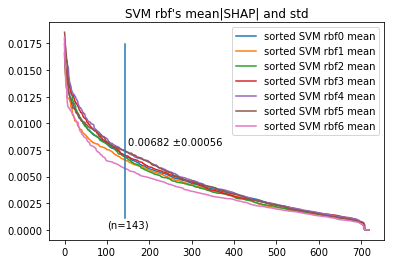

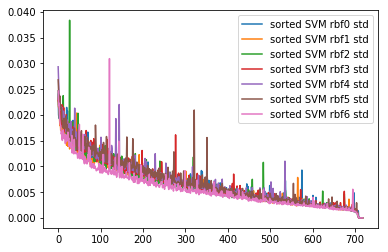

In [27]:
mean = round(SHAP_SVM_rbf.loc[143][7:14].mean(), 5)
std = round(SHAP_SVM_rbf.loc[143][7:14].std(), 5)
# mean
ax2 = SHAP_SVM_rbf[SHAP_SVM_rbf.columns[7:14]].plot()
# text
plt.title("SVM rbf's mean|SHAP| and std")
plt.axvline(x=143, ymin=0.1, ymax=0.9)
plt.text(100, 0.0002, '(n=143)')
plt.text(150, 0.008, f"{mean} \u00B1{std}")
# std
SHAP_SVM_rbf[SHAP_SVM_rbf.columns[14:]].plot()

20% point: 143


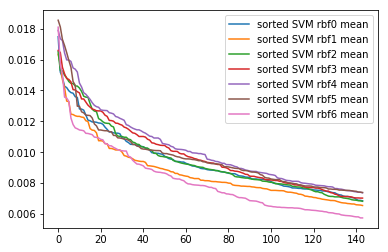

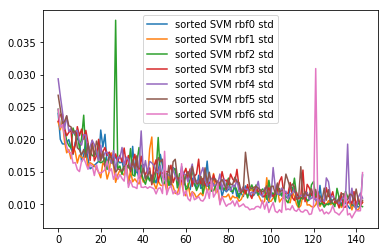

In [28]:
number = math.floor(len(SHAP_SVM_rbf)*0.2)
ST_SVM_rbf = SHAP_SVM_rbf.loc[:number]
# Mean
ST_SVM_rbf[ST_SVM_rbf.columns[7:14]].plot()
# Std
ST_SVM_rbf[ST_SVM_rbf.columns[14:]].plot()
print(f"20% point: {number}")

In [29]:
ST_SVM_rbf['SVM all mean'] = ST_SVM_rbf[ST_SVM_rbf.columns[7:14]].mean(axis=1)

In [30]:
ST_SVM_rbf

,SVM rbf0 name,SVM rbf1 name,SVM rbf2 name,SVM rbf3 name,SVM rbf4 name,SVM rbf5 name,SVM rbf6 name,sorted SVM rbf0 mean,sorted SVM rbf1 mean,sorted SVM rbf2 mean,...,sorted SVM rbf5 mean,sorted SVM rbf6 mean,sorted SVM rbf0 std,sorted SVM rbf1 std,sorted SVM rbf2 std,sorted SVM rbf3 std,sorted SVM rbf4 std,sorted SVM rbf5 std,sorted SVM rbf6 std,SVM all mean
0,T1w_subcor_Right-Amygdala_volume,T1w_subcor_CC_Anterior_volume,T1w_cor_paracentral-rh-thicknessstd,T1w_subcor_Left-Inf-Lat-Vent_mean,T1w_subcor_Brain-Stem_mean,T1w_subcor_CC_Anterior_mean,T1w_subcor_Right-Inf-Lat-Vent_mean,0.017480,0.016343,0.016510,...,0.018549,0.018098,0.024026,0.022702,0.024666,0.022756,0.029348,0.026813,0.024646,0.017353
1,T1w_subcor_Right-Hippocampus_mean,T1w_subcor_Right-Cerebellum-Cortex_volume,T1w_cor_rostralanteriorcingulate-rh-thickness,T1w_subcor_Right-Inf-Lat-Vent_mean,T1w_cor_parahippocampal-lh-volume,T1w_cor_lateraloccipital-rh-thickness,T1w_cor_entorhinal-rh-meancurv,0.015196,0.015706,0.015304,...,0.018118,0.015647,0.020027,0.021490,0.021876,0.023760,0.026730,0.024739,0.021854,0.016255
2,T1w_cor_lateraloccipital-rh-meancurv,DTI_SCC_Average,T1w_subcor_CC_Anterior_volume,DTI_SCC_Average,T1w_cor_lateraloccipital-rh-meancurv,T1w_subcor_CC_Central_mean,T1w_subcor_Right-Hippocampus_mean,0.014843,0.014706,0.015265,...,0.017304,0.015069,0.019325,0.022761,0.022255,0.023929,0.024377,0.022457,0.022298,0.015703
3,T1w_subcor_Brain-Stem_mean,T1w_subcor_Left-Cerebellum-Cortex_volume,T1w_cor_pericalcarine-lh-meancurv,T1w_cor_rostralanteriorcingulate-rh-thickness,DTI_SCC_Average,T1w_cor_lateralorbitofrontal-lh-meancurv,T1w_cor_caudalmiddlefrontal-rh-foldind,0.014275,0.014196,0.014980,...,0.016912,0.013569,0.019293,0.019680,0.021650,0.021688,0.021567,0.022779,0.020617,0.015063
4,T1w_cor_transversetemporal-lh-thicknessstd,T1w_cor_lingual-lh-thicknessstd,T1w_subcor_Right-Amygdala_volume,T1w_subcor_Left-choroid-plexus_volume,T1w_cor_transversetemporal-lh-thicknessstd,T1w_cor_parahippocampal-rh-area,T1w_subcor_Left-Hippocampus_mean,0.014186,0.013314,0.014824,...,0.016451,0.013510,0.019598,0.017946,0.019753,0.020583,0.023639,0.023653,0.018880,0.014720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,T1w_cor_postcentral-lh-thickness,T1w_cor_parahippocampal-rh-foldind,T1w_cor_pericalcarine-rh-meancurv,T1w_cor_fusiform-rh-volume,T1w_cor_inferiortemporal-rh-meancurv,T1w_cor_pericalcarine-rh-volume,T1w_cor_lateraloccipital-lh-gauscurv,0.007049,0.006647,0.006902,...,0.007480,0.005833,0.009737,0.010239,0.009832,0.011974,0.009986,0.010512,0.008518,0.006916
140,T1w_cor_pericalcarine-lh-foldind,T1w_cor_pericalcarine-rh-volume,T1w_cor_isthmuscingulate-lh-meancurv,T1w_cor_transversetemporal-rh-volume,DTI_SLF_Average,T1w_cor_precentral-rh-meancurv,T1w_cor_rostralmiddlefrontal-rh-foldind,0.006951,0.006598,0.006892,...,0.007471,0.005814,0.009874,0.009218,0.009418,0.009826,0.009235,0.012358,0.009064,0.006885
141,T1w_subcor_Left-Accumbens-area_volume,T1w_cor_parahippocampal-rh-volume,T1w_cor_inferiorparietal-rh-volume,T1w_cor_entorhinal-rh-gauscurv,T1w_subcor_BrainSegVol-to-eTIV_volume,DTI_ALIC_Average,DTI_ALIC-R_Average,0.006882,0.006588,0.006863,...,0.007422,0.005814,0.009573,0.009182,0.010240,0.010971,0.011076,0.010516,0.008984,0.006860
142,T1w_subcor_4th-Ventricle_mean,T1w_cor_inferiorparietal-rh-thicknessstd,DTI_CGH_Average,T1w_cor_caudalanteriorcingulate-lh-thicknessstd,T1w_cor_caudalmiddlefrontal-rh-volume,DTI_FX/ST-L_Average,T1w_cor_middletemporal-lh-thickness,0.006882,0.006578,0.006853,...,0.007412,0.005745,0.009841,0.009684,0.009791,0.009884,0.011744,0.010048,0.009014,0.006845


### 4.1.5. Consistent feature importance in SVM-rbf

<b>Generate the SHAP table</b>

In [31]:
DF = SHAP_SVM_rbf

In [32]:
SHAP_table(DF, viz = False)

,Type,SVM-rbf 0,SVM-rbf1,SVM-rbf2,SVM-rbf3,SVM-rbf4,SVM-rbf5,SVM-rbf6,Intersection
0,DTI,63,63,63,63,63,63,63,63
1,T1w subcortical,108,108,108,108,108,108,108,108
2,T1w cortical,548,548,548,548,548,548,548,548


<b> Top 1 - Common feature importance (n=14)

In [33]:
SHAP_top30 = SHAP_SVM_rbf.loc[:14]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=0): set() 

selected T1w Subcortical: (n=0): set() 

selected T1w Cortical: (n=1): {'T1w_cor_lateraloccipital-rh-thickness'} 




,Type,SVM-rbf 0,SVM-rbf1,SVM-rbf2,SVM-rbf3,SVM-rbf4,SVM-rbf5,SVM-rbf6,Intersection
0,DTI,1,1,1,2,1,1,2,0
1,T1w subcortical,7,5,5,6,5,4,7,0
2,T1w cortical,7,9,9,7,9,10,6,1


<b> Top 2 - Common feature importance (n=29)

In [34]:
SHAP_top30 = SHAP_SVM_rbf.loc[:28]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=1): {'DTI_SCC_Average'} 

selected T1w Subcortical: (n=0): set() 

selected T1w Cortical: (n=1): {'T1w_cor_lateraloccipital-rh-thickness'} 




,Type,SVM-rbf 0,SVM-rbf1,SVM-rbf2,SVM-rbf3,SVM-rbf4,SVM-rbf5,SVM-rbf6,Intersection
0,DTI,2,1,2,3,1,2,3,1
1,T1w subcortical,10,10,9,11,8,5,13,0
2,T1w cortical,17,18,18,15,20,22,13,1


<b> Top 5 - Common feature importance (n=47)

In [35]:
SHAP_top30 = SHAP_SVM_rbf.loc[:46]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=2): {'DTI_SCC_Average', 'DTI_RLIC-R_Average'} 

selected T1w Subcortical: (n=1): {'T1w_subcor_Left-Hippocampus_mean'} 

selected T1w Cortical: (n=2): {'T1w_cor_parahippocampal-rh-area', 'T1w_cor_lateraloccipital-rh-thickness'} 




,Type,SVM-rbf 0,SVM-rbf1,SVM-rbf2,SVM-rbf3,SVM-rbf4,SVM-rbf5,SVM-rbf6,Intersection
0,DTI,3,3,3,4,4,3,6,2
1,T1w subcortical,14,15,14,20,12,10,17,1
2,T1w cortical,30,29,30,23,31,34,24,2


<b> Top 10 - Common feature importance (n=71)

In [36]:
SHAP_top30 = SHAP_SVM_rbf.loc[:70]
DF = SHAP_top30
SHAP_table(DF, viz = True)

selected DTI (n=2): {'DTI_SCC_Average', 'DTI_RLIC-R_Average'} 

selected T1w Subcortical: (n=4): {'T1w_subcor_Left-Hippocampus_mean', 'T1w_subcor_CSF_mean', 'T1w_subcor_Brain-Stem_mean', 'T1w_subcor_Left-choroid-plexus_volume'} 

selected T1w Cortical: (n=4): {'T1w_cor_superiorparietal-rh-thickness', 'T1w_cor_parahippocampal-rh-area', 'T1w_cor_lateraloccipital-rh-thickness', 'T1w_cor_cuneus-rh-thickness'} 




,Type,SVM-rbf 0,SVM-rbf1,SVM-rbf2,SVM-rbf3,SVM-rbf4,SVM-rbf5,SVM-rbf6,Intersection
0,DTI,4,5,5,4,7,4,7,2
1,T1w subcortical,15,19,18,24,14,15,21,4
2,T1w cortical,52,47,48,43,50,52,43,4


<b> Top 15 - Common feature importance (n=100)

In [37]:
SHAP_top100 = SHAP_SVM_rbf.loc[:99]
DF = SHAP_top100
SHAP_table(DF, viz = True)

selected DTI (n=3): {'DTI_RLIC_Average', 'DTI_SCC_Average', 'DTI_RLIC-R_Average'} 

selected T1w Subcortical: (n=5): {'T1w_subcor_CSF_mean', 'T1w_subcor_Right-Hippocampus_mean', 'T1w_subcor_Left-choroid-plexus_volume', 'T1w_subcor_Left-Hippocampus_mean', 'T1w_subcor_Brain-Stem_mean'} 

selected T1w Cortical: (n=7): {'T1w_cor_lateraloccipital-rh-thickness', 'T1w_cor_cuneus-rh-thickness', 'T1w_cor_fusiform-lh-curvind', 'T1w_cor_rostralanteriorcingulate-rh-thickness', 'T1w_cor_caudalanteriorcingulate-lh-foldind', 'T1w_cor_superiorparietal-rh-thickness', 'T1w_cor_parahippocampal-rh-area'} 




,Type,SVM-rbf 0,SVM-rbf1,SVM-rbf2,SVM-rbf3,SVM-rbf4,SVM-rbf5,SVM-rbf6,Intersection
0,DTI,8,9,8,7,10,4,9,3
1,T1w subcortical,21,25,24,27,21,19,26,5
2,T1w cortical,71,66,68,66,69,77,65,7


<b> Top 35 - Common feature importance (n=143), Short tail (20%) </b>

In [38]:
print(f"20% point: {number}")
SHAP_20 = SHAP_SVM_rbf.loc[:number-1]
SHAP_80 = SHAP_SVM_rbf.loc[number:]
SHAP_20

20% point: 143


,SVM rbf0 name,SVM rbf1 name,SVM rbf2 name,SVM rbf3 name,SVM rbf4 name,SVM rbf5 name,SVM rbf6 name,sorted SVM rbf0 mean,sorted SVM rbf1 mean,sorted SVM rbf2 mean,...,sorted SVM rbf4 mean,sorted SVM rbf5 mean,sorted SVM rbf6 mean,sorted SVM rbf0 std,sorted SVM rbf1 std,sorted SVM rbf2 std,sorted SVM rbf3 std,sorted SVM rbf4 std,sorted SVM rbf5 std,sorted SVM rbf6 std
0,T1w_subcor_Right-Amygdala_volume,T1w_subcor_CC_Anterior_volume,T1w_cor_paracentral-rh-thicknessstd,T1w_subcor_Left-Inf-Lat-Vent_mean,T1w_subcor_Brain-Stem_mean,T1w_subcor_CC_Anterior_mean,T1w_subcor_Right-Inf-Lat-Vent_mean,0.017480,0.016343,0.016510,...,0.017892,0.018549,0.018098,0.024026,0.022702,0.024666,0.022756,0.029348,0.026813,0.024646
1,T1w_subcor_Right-Hippocampus_mean,T1w_subcor_Right-Cerebellum-Cortex_volume,T1w_cor_rostralanteriorcingulate-rh-thickness,T1w_subcor_Right-Inf-Lat-Vent_mean,T1w_cor_parahippocampal-lh-volume,T1w_cor_lateraloccipital-rh-thickness,T1w_cor_entorhinal-rh-meancurv,0.015196,0.015706,0.015304,...,0.017353,0.018118,0.015647,0.020027,0.021490,0.021876,0.023760,0.026730,0.024739,0.021854
2,T1w_cor_lateraloccipital-rh-meancurv,DTI_SCC_Average,T1w_subcor_CC_Anterior_volume,DTI_SCC_Average,T1w_cor_lateraloccipital-rh-meancurv,T1w_subcor_CC_Central_mean,T1w_subcor_Right-Hippocampus_mean,0.014843,0.014706,0.015265,...,0.017235,0.017304,0.015069,0.019325,0.022761,0.022255,0.023929,0.024377,0.022457,0.022298
3,T1w_subcor_Brain-Stem_mean,T1w_subcor_Left-Cerebellum-Cortex_volume,T1w_cor_pericalcarine-lh-meancurv,T1w_cor_rostralanteriorcingulate-rh-thickness,DTI_SCC_Average,T1w_cor_lateralorbitofrontal-lh-meancurv,T1w_cor_caudalmiddlefrontal-rh-foldind,0.014275,0.014196,0.014980,...,0.016431,0.016912,0.013569,0.019293,0.019680,0.021650,0.021688,0.021567,0.022779,0.020617
4,T1w_cor_transversetemporal-lh-thicknessstd,T1w_cor_lingual-lh-thicknessstd,T1w_subcor_Right-Amygdala_volume,T1w_subcor_Left-choroid-plexus_volume,T1w_cor_transversetemporal-lh-thicknessstd,T1w_cor_parahippocampal-rh-area,T1w_subcor_Left-Hippocampus_mean,0.014186,0.013314,0.014824,...,0.015980,0.016451,0.013510,0.019598,0.017946,0.019753,0.020583,0.023639,0.023653,0.018880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,T1w_cor_parsorbitalis-lh-area,T1w_subcor_Right-Lateral-Ventricle_mean,T1w_cor_entorhinal-rh-thicknessstd,T1w_subcor_Brain-Stem_volume,T1w_subcor_Left-vessel_mean,T1w_cor_paracentral-rh-thicknessstd,T1w_cor_medialorbitofrontal-lh-thicknessstd,0.007059,0.006647,0.006922,...,0.007490,0.007500,0.005863,0.009828,0.009136,0.009950,0.010045,0.012484,0.011410,0.007903
139,T1w_cor_postcentral-lh-thickness,T1w_cor_parahippocampal-rh-foldind,T1w_cor_pericalcarine-rh-meancurv,T1w_cor_fusiform-rh-volume,T1w_cor_inferiortemporal-rh-meancurv,T1w_cor_pericalcarine-rh-volume,T1w_cor_lateraloccipital-lh-gauscurv,0.007049,0.006647,0.006902,...,0.007451,0.007480,0.005833,0.009737,0.010239,0.009832,0.011974,0.009986,0.010512,0.008518
140,T1w_cor_pericalcarine-lh-foldind,T1w_cor_pericalcarine-rh-volume,T1w_cor_isthmuscingulate-lh-meancurv,T1w_cor_transversetemporal-rh-volume,DTI_SLF_Average,T1w_cor_precentral-rh-meancurv,T1w_cor_rostralmiddlefrontal-rh-foldind,0.006951,0.006598,0.006892,...,0.007431,0.007471,0.005814,0.009874,0.009218,0.009418,0.009826,0.009235,0.012358,0.009064
141,T1w_subcor_Left-Accumbens-area_volume,T1w_cor_parahippocampal-rh-volume,T1w_cor_inferiorparietal-rh-volume,T1w_cor_entorhinal-rh-gauscurv,T1w_subcor_BrainSegVol-to-eTIV_volume,DTI_ALIC_Average,DTI_ALIC-R_Average,0.006882,0.006588,0.006863,...,0.007412,0.007422,0.005814,0.009573,0.009182,0.010240,0.010971,0.011076,0.010516,0.008984


In [39]:
DF = SHAP_20
SHAP_table(DF, viz = True)

selected DTI (n=4): {'DTI_SCC_Average', 'DTI_CGH-L_Average', 'DTI_RLIC_Average', 'DTI_RLIC-R_Average'} 

selected T1w Subcortical: (n=12): {'T1w_subcor_CC_Anterior_volume', 'T1w_subcor_CSF_mean', 'T1w_subcor_Right-Caudate_mean', 'T1w_subcor_Right-Hippocampus_mean', 'T1w_subcor_Right-Putamen_mean', 'T1w_subcor_3rd-Ventricle_mean', 'T1w_subcor_Right-Amygdala_mean', 'T1w_subcor_Left-Cerebellum-White-Matter_volume', 'T1w_subcor_Left-choroid-plexus_volume', 'T1w_subcor_Left-Hippocampus_mean', 'T1w_subcor_Brain-Stem_mean', 'T1w_subcor_Right-Inf-Lat-Vent_mean'} 

selected T1w Cortical: (n=19): {'T1w_cor_parahippocampal-rh-meancurv', 'T1w_cor_rostralanteriorcingulate-lh-thickness', 'T1w_cor_superiorparietal-rh-thickness', 'T1w_cor_caudalmiddlefrontal-rh-curvind', 'T1w_cor_parahippocampal-rh-area', 'T1w_cor_caudalanteriorcingulate-lh-foldind', 'T1w_cor_middletemporal-lh-thickness', 'T1w_cor_superiorparietal-rh-volume', 'T1w_cor_parahippocampal-lh-volume', 'T1w_cor_paracentral-lh-meancurv', 'T1w

,Type,SVM-rbf 0,SVM-rbf1,SVM-rbf2,SVM-rbf3,SVM-rbf4,SVM-rbf5,SVM-rbf6,Intersection
0,DTI,11,12,10,10,17,9,12,4
1,T1w subcortical,29,30,30,32,27,25,35,12
2,T1w cortical,103,101,103,101,99,109,96,19


<b> Bottom 403 - Common feature importance (n=576), Long tail (20%)</b>
SHAP_80

In [40]:
DF = SHAP_80
SHAP_table(DF, viz = False)

,Type,SVM-rbf 0,SVM-rbf1,SVM-rbf2,SVM-rbf3,SVM-rbf4,SVM-rbf5,SVM-rbf6,Intersection
0,DTI,52,51,53,53,46,54,51,34
1,T1w subcortical,79,78,78,76,81,83,73,57
2,T1w cortical,445,447,445,447,449,439,452,312


### 4.1.6. Feature importance, mean|SHAP| distribution

<b>generate the columns</b>

In [42]:
def type_check(col):
    if 'cor' == col.split('_')[1]:
        return "Cortical region"
    elif 'subcor' == col.split('_')[1]:
        return "Subcortical region"
    else:
        return "DTI region"

def lobe_region(col):
    if 'cor' == col.split('_')[1]:
        temporal_lobe = {'bankssts', 'entorhinal', 'fusiform', 'inferiortemporal', 'middletemporal',
                         'parahippocampal','superiortemporal', 'temporalpole', 'transversetemporal'}
        frontal_lobe = {'caudalmiddlefrontal', 'lateralorbitofrontal', 'paracentral', 'parsopercularis',
                        'parsorbitalis', 'parstriangularis', 'precentral', 'rostralmiddlefrontal',
                        'superiorfrontal', 'medialorbitofrontal', 'frontalpole'}
        parietal_lobe = {'inferiorparietal', 'postcentral', 'precuneus', 'superiorparietal', 'supramarginal'}
        occipital_lobe = {'cuneus', 'lateraloccipital', 'pericalcarine', 'lingual'}
        cingulate_cortex = {'caudalanteriorcingulate', 'isthmuscingulate', 'posteriorcingulate', 'rostralanteriorcingulate'}
        insula_cortex = {'insula'}
        check = col.split('_')[2].split('-')[0]
        if check in temporal_lobe:
            return 'Temporal lobe'
        elif check in frontal_lobe:
            return 'Frontal lobe'
        elif check in parietal_lobe:
            return 'Parietal lobe'
        elif check in occipital_lobe:
            return 'Occipital lobe'
        elif check in cingulate_cortex:
            return 'Cingulate cortex'
        elif check in insula_cortex:
            return 'Insula cortex'
        else:
            return 'Other'
    elif 'subcor' == col.split('_')[1]:
        return 'Subcortical region' # To do
    else:
        return 'DTI region' # To do

In [41]:
GB_c = ['GB0 mean','GB1 mean','GB2 mean','GB3 mean','GB4 mean','GB5 mean','GB6 mean']
LR_c = ['LR0 mean','LR1 mean','LR2 mean','LR3 mean','LR4 mean','LR5 mean','LR6 mean']
SVM_lin_c = ['SVM_lin0 mean','SVM_lin1 mean','SVM_lin2 mean','SVM_lin3 mean','SVM_lin4 mean','SVM_lin5 mean','SVM_lin6 mean']
SVM_rbf_c = ['SVM_rbf0 mean','SVM_rbf1 mean', 'SVM_rbf2 mean', 'SVM_rbf3 mean', 'SVM_rbf4 mean', 'SVM_rbf5 mean', 'SVM_rbf6 mean']

In [43]:
SHAP['Modality'] = [i.split('_')[0] for i in SHAP['Col names']]
SHAP['Type'] = [type_check(i) for i in SHAP['Col names']]
SHAP['Lobe Region'] = [lobe_region(i) for i in SHAP['Col names']]
SHAP['Value'] = [i.split('-')[-1].split('_')[-1] for i in SHAP['Col names']]
SHAP['GB_All mean'] = SHAP[GB_c].mean(axis=1)
SHAP['LR_All mean'] = SHAP[LR_c].mean(axis=1)
SHAP['SVM_lin_All mean'] = SHAP[SVM_lin_c].mean(axis=1)
SHAP['SVM_rbf_All mean'] = SHAP[SVM_rbf_c].mean(axis=1)
SHAP['GB_All std'] = SHAP[GB_c].std(axis=1)
SHAP['LR_All std'] = SHAP[LR_c].std(axis=1)
SHAP['SVM_lin_All std'] = SHAP[SVM_lin_c].std(axis=1)
SHAP['SVM_rbf_All std'] = SHAP[SVM_rbf_c].std(axis=1)

In [44]:
plt.rcParams["figure.figsize"] = (80,20)

<b> All model: Model by Model

In [45]:
SHAP_T = SHAP.transpose()
SHAP_T = SHAP_T.rename(columns=SHAP_T.iloc[56])
SHAP_Model = SHAP_T.iloc[0:28]
SHAP_T = SHAP_Model.astype('float')

In [46]:
# plt.pcolor(SHAP_T)
# plt.title('Heatmap of Feature importance', fontsize=20)
# plt.colorbar()

Text(0.5, 1.0, 'Heatmap of Feature importance')

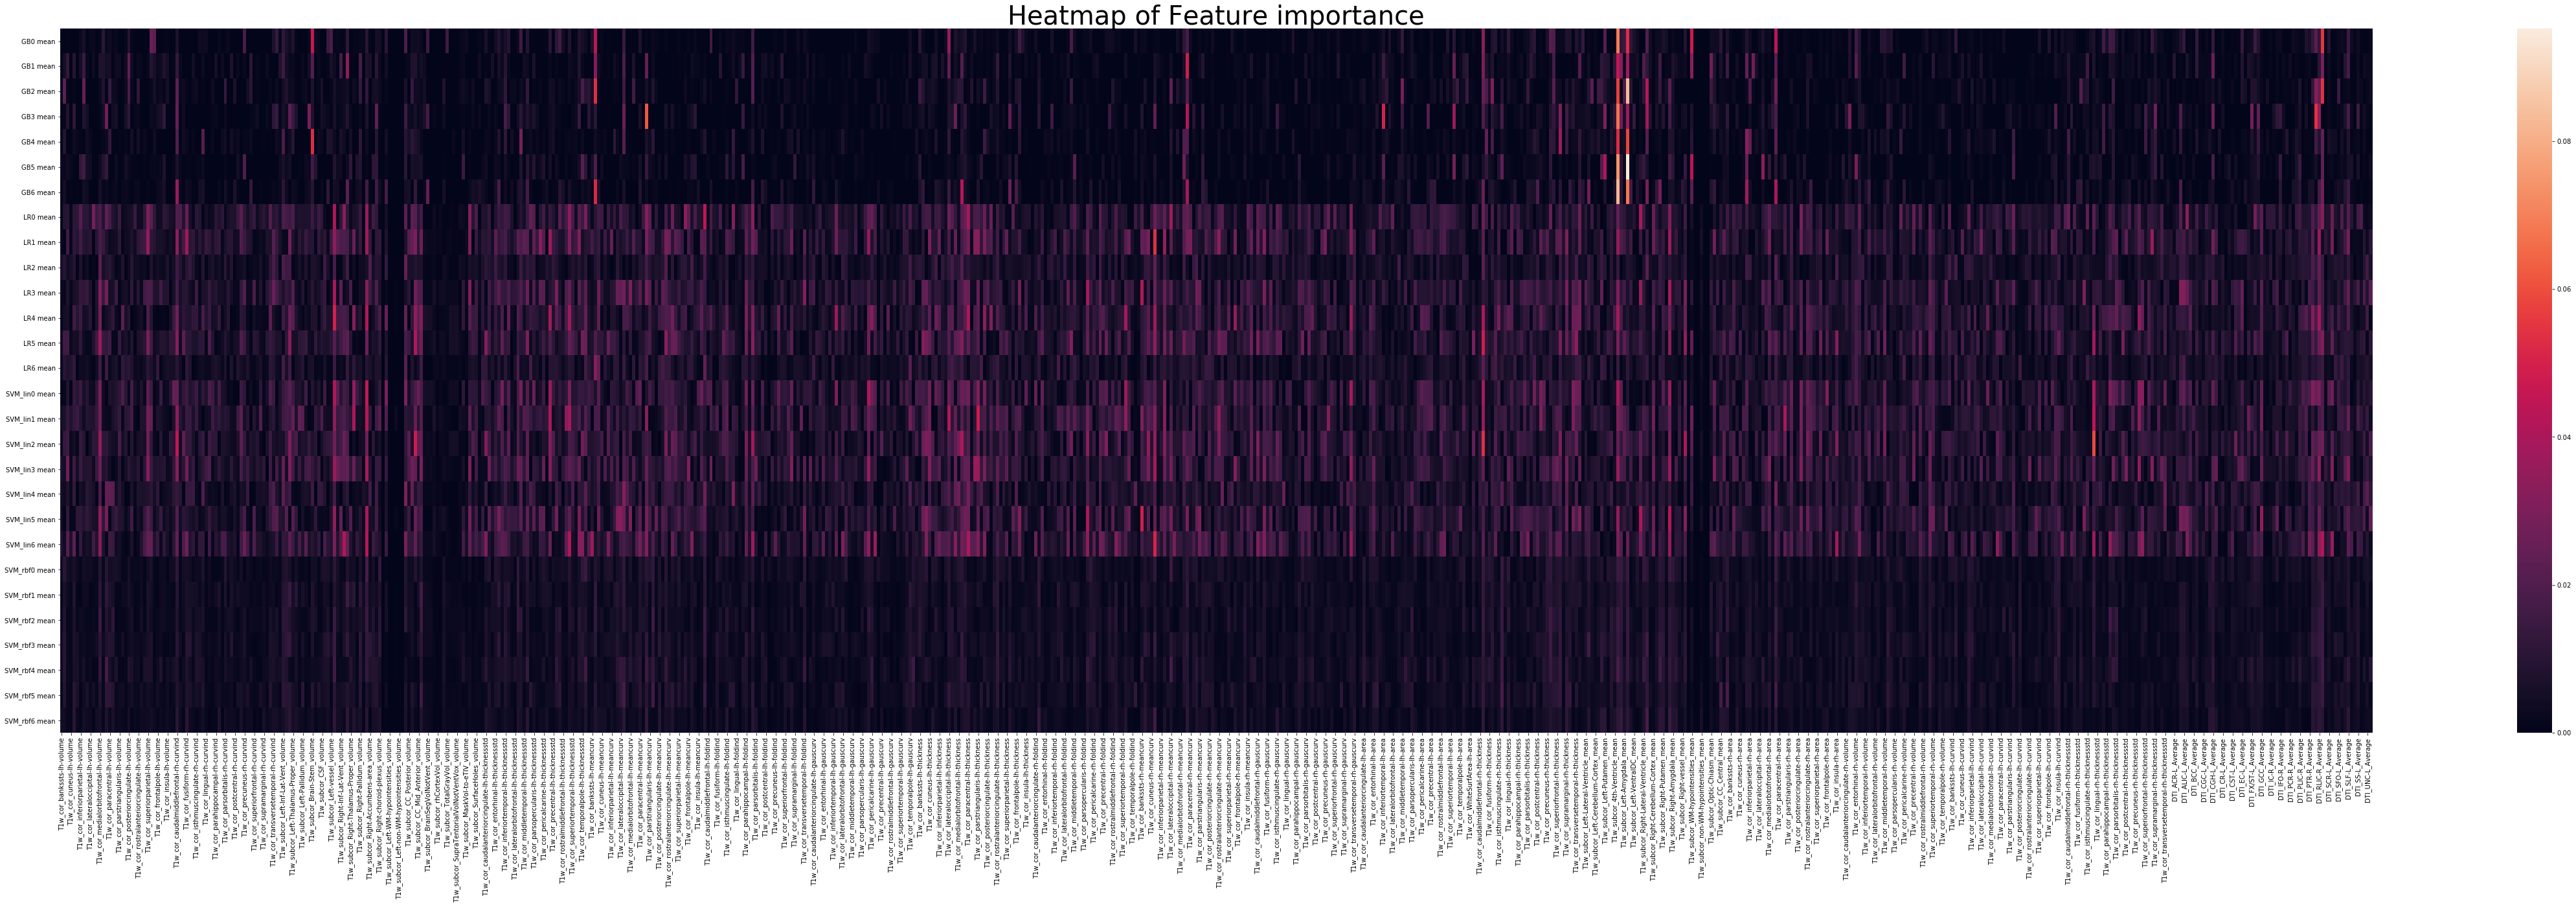

In [47]:
ax = sns.heatmap(SHAP_T)
plt.title('Heatmap of Feature importance', fontsize=40)
# plt.savefig('/figrues/Heatmap_SHAP_Model.pdf')

<b> GB and SVM-rbf

In [48]:
SHAP_Two = SHAP_T.loc[['GB0 mean','GB1 mean','GB2 mean',
            'GB3 mean','GB4 mean','GB5 mean','GB6 mean',
            'SVM_rbf0 mean','SVM_rbf1 mean','SVM_rbf2 mean','SVM_rbf3 mean',
            'SVM_rbf4 mean','SVM_rbf5 mean','SVM_rbf6 mean'], :]

In [49]:
# plt.pcolor(SHAP_Two)
# plt.title('Heatmap of Feature importance', fontsize=20)
# plt.colorbar()

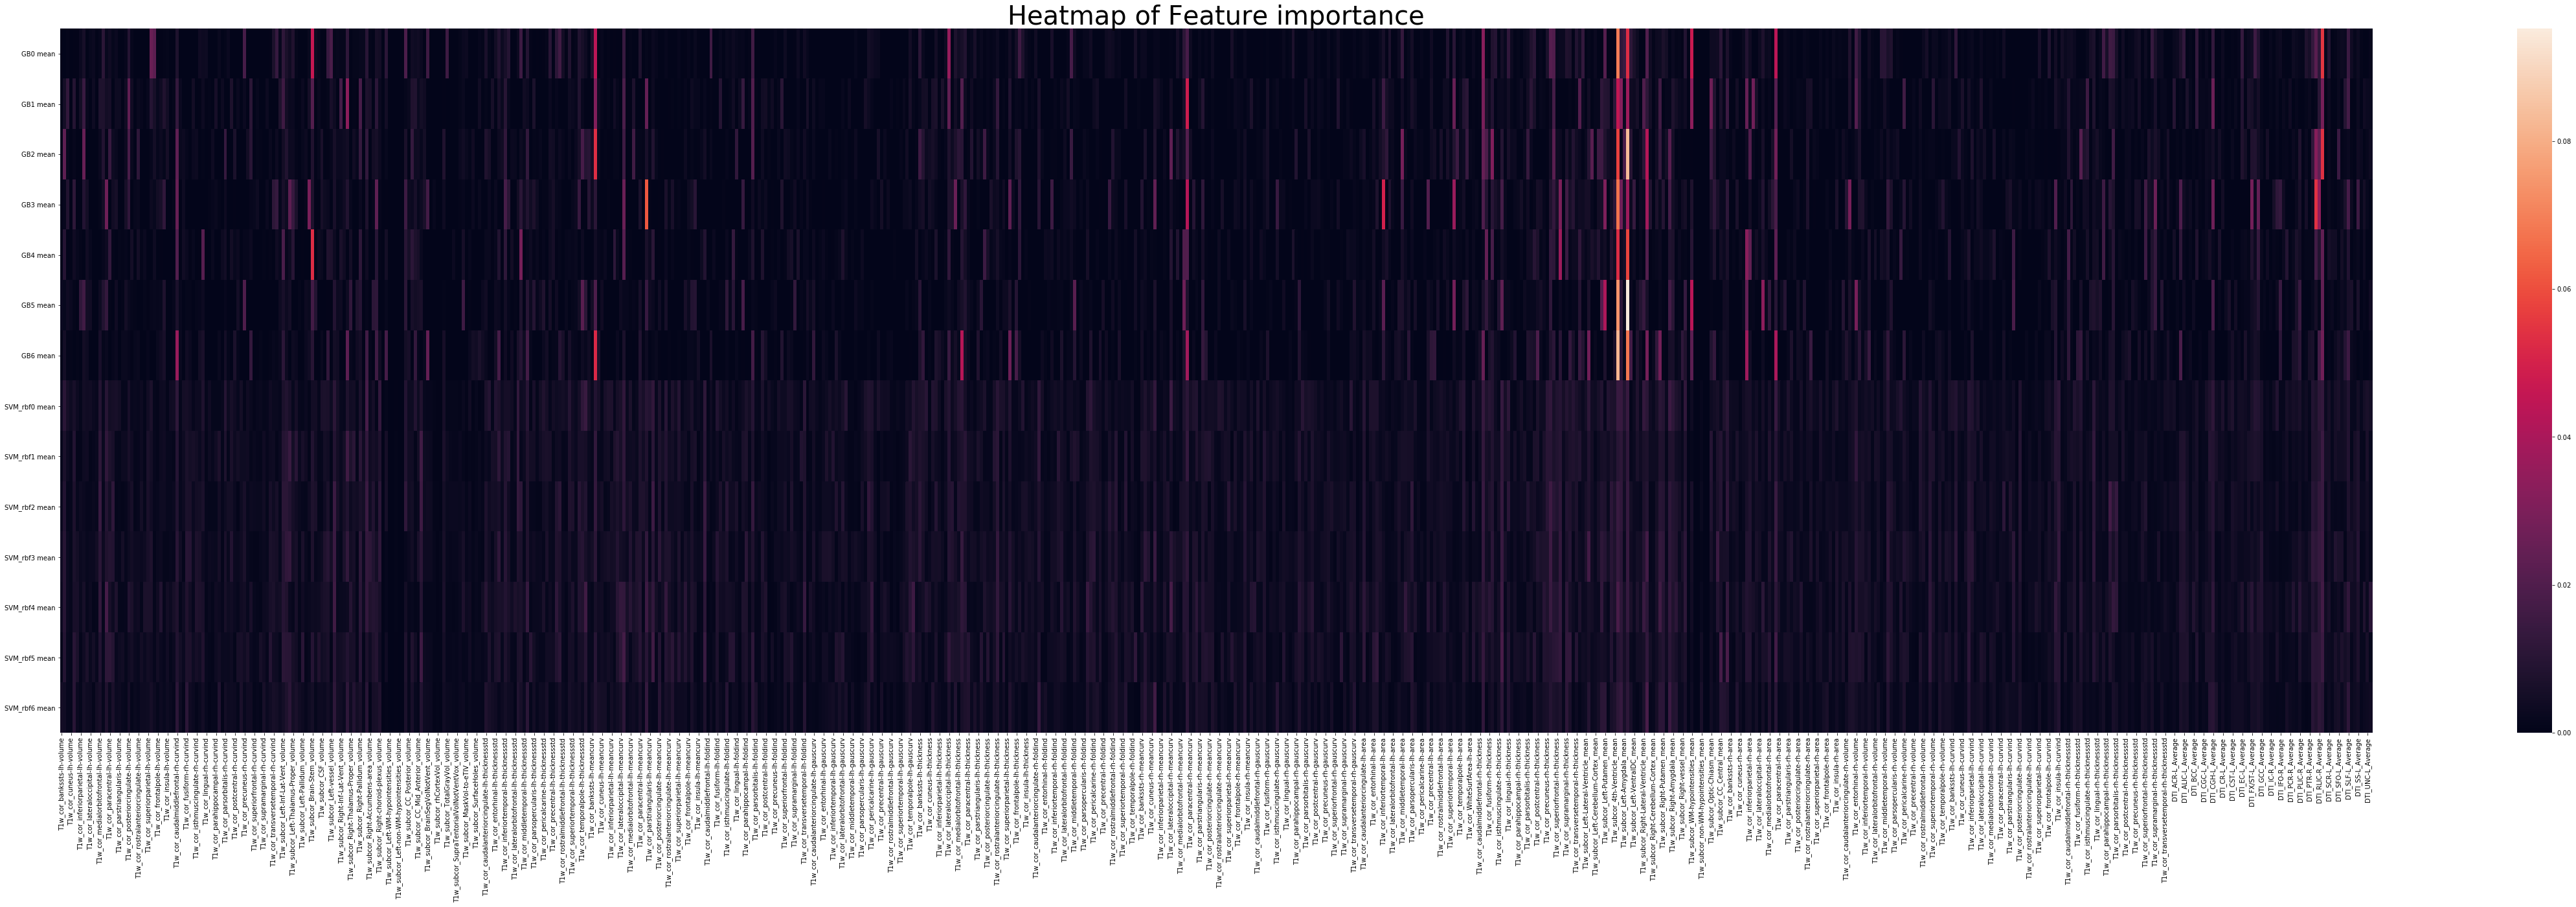

In [50]:
ax = sns.heatmap(SHAP_Two)
plt.title('Heatmap of Feature importance', fontsize=40)
plt.savefig('figures/Heatmap_SHAP_GB_SVMrbf.pdf')

<b> All model: Trial by Trial <b>

In [51]:
SHAP_Trial = SHAP_T.loc[['LR0 mean','SVM_lin0 mean','GB0 mean','SVM_rbf0 mean',
                         'LR1 mean','SVM_lin1 mean','GB1 mean','SVM_rbf1 mean',
                         'LR2 mean','SVM_lin2 mean','GB2 mean','SVM_rbf2 mean',
                         'LR3 mean','SVM_lin3 mean','GB3 mean','SVM_rbf3 mean',
                         'LR4 mean','SVM_lin4 mean','GB4 mean','SVM_rbf4 mean',
                         'LR5 mean','SVM_lin5 mean','GB5 mean','SVM_rbf5 mean',
                         'LR6 mean','SVM_lin6 mean','GB6 mean','SVM_rbf6 mean'], :]

In [52]:
# plt.pcolor(SHAP_Trial)
# plt.title('Heatmap of mean|SHAP| on models', fontsize=40)
# plt.colorbar()

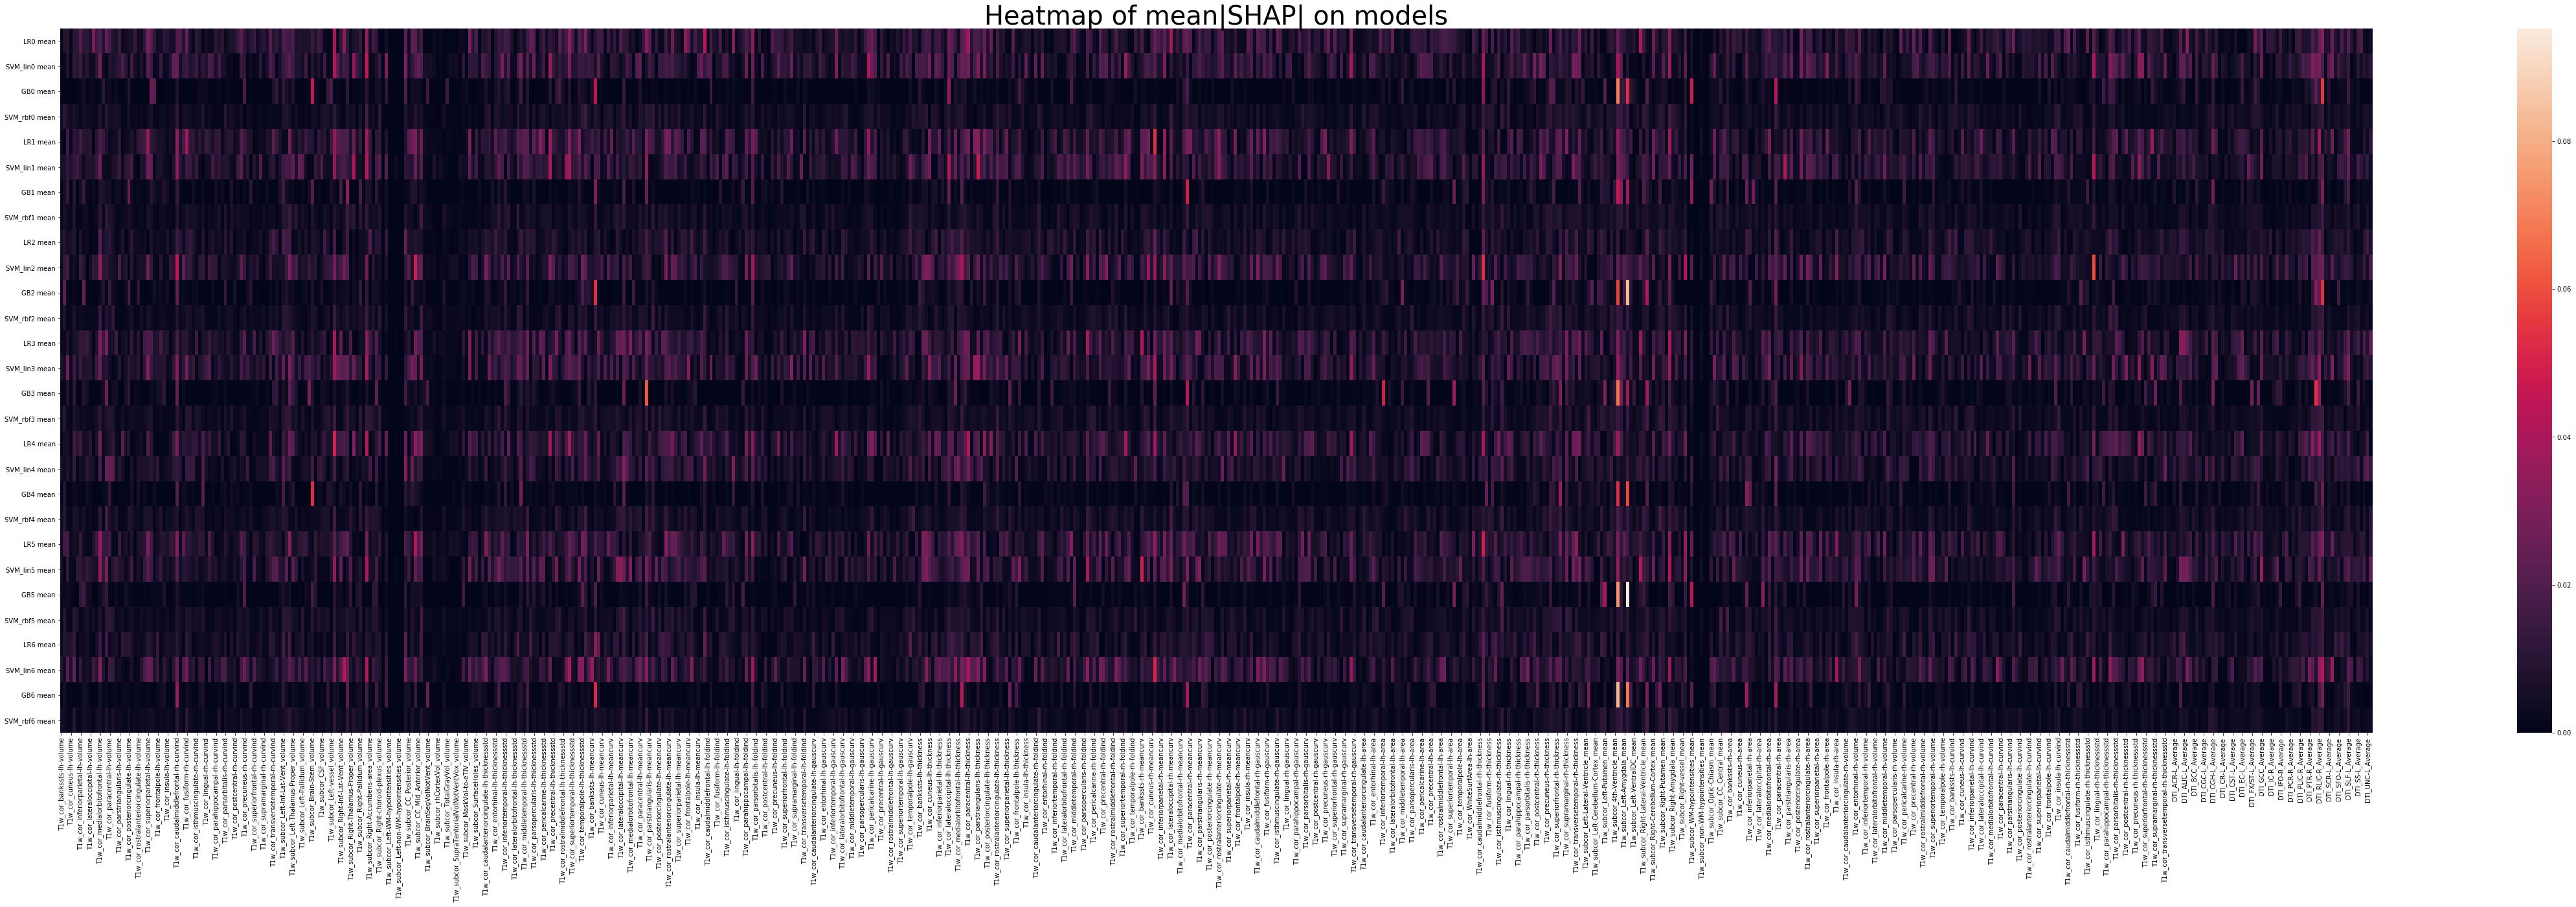

In [53]:
ax = sns.heatmap(SHAP_Trial)
plt.title('Heatmap of mean|SHAP| on models', fontsize=40)
plt.savefig('figures/Heatmap_SHAP_Trial.pdf')

### 4.1.6. Feature importance in SVM-rbf, mean of mean|SHAP| distribution

<b> Sorted by value specific

In [54]:
SHAP2 = SHAP.sort_values(by=['Type','Value','Lobe Region','SVM_rbf_All mean'],
                         ascending=[True,True,True,False])
SHAP2 = SHAP2.set_index('Col names')

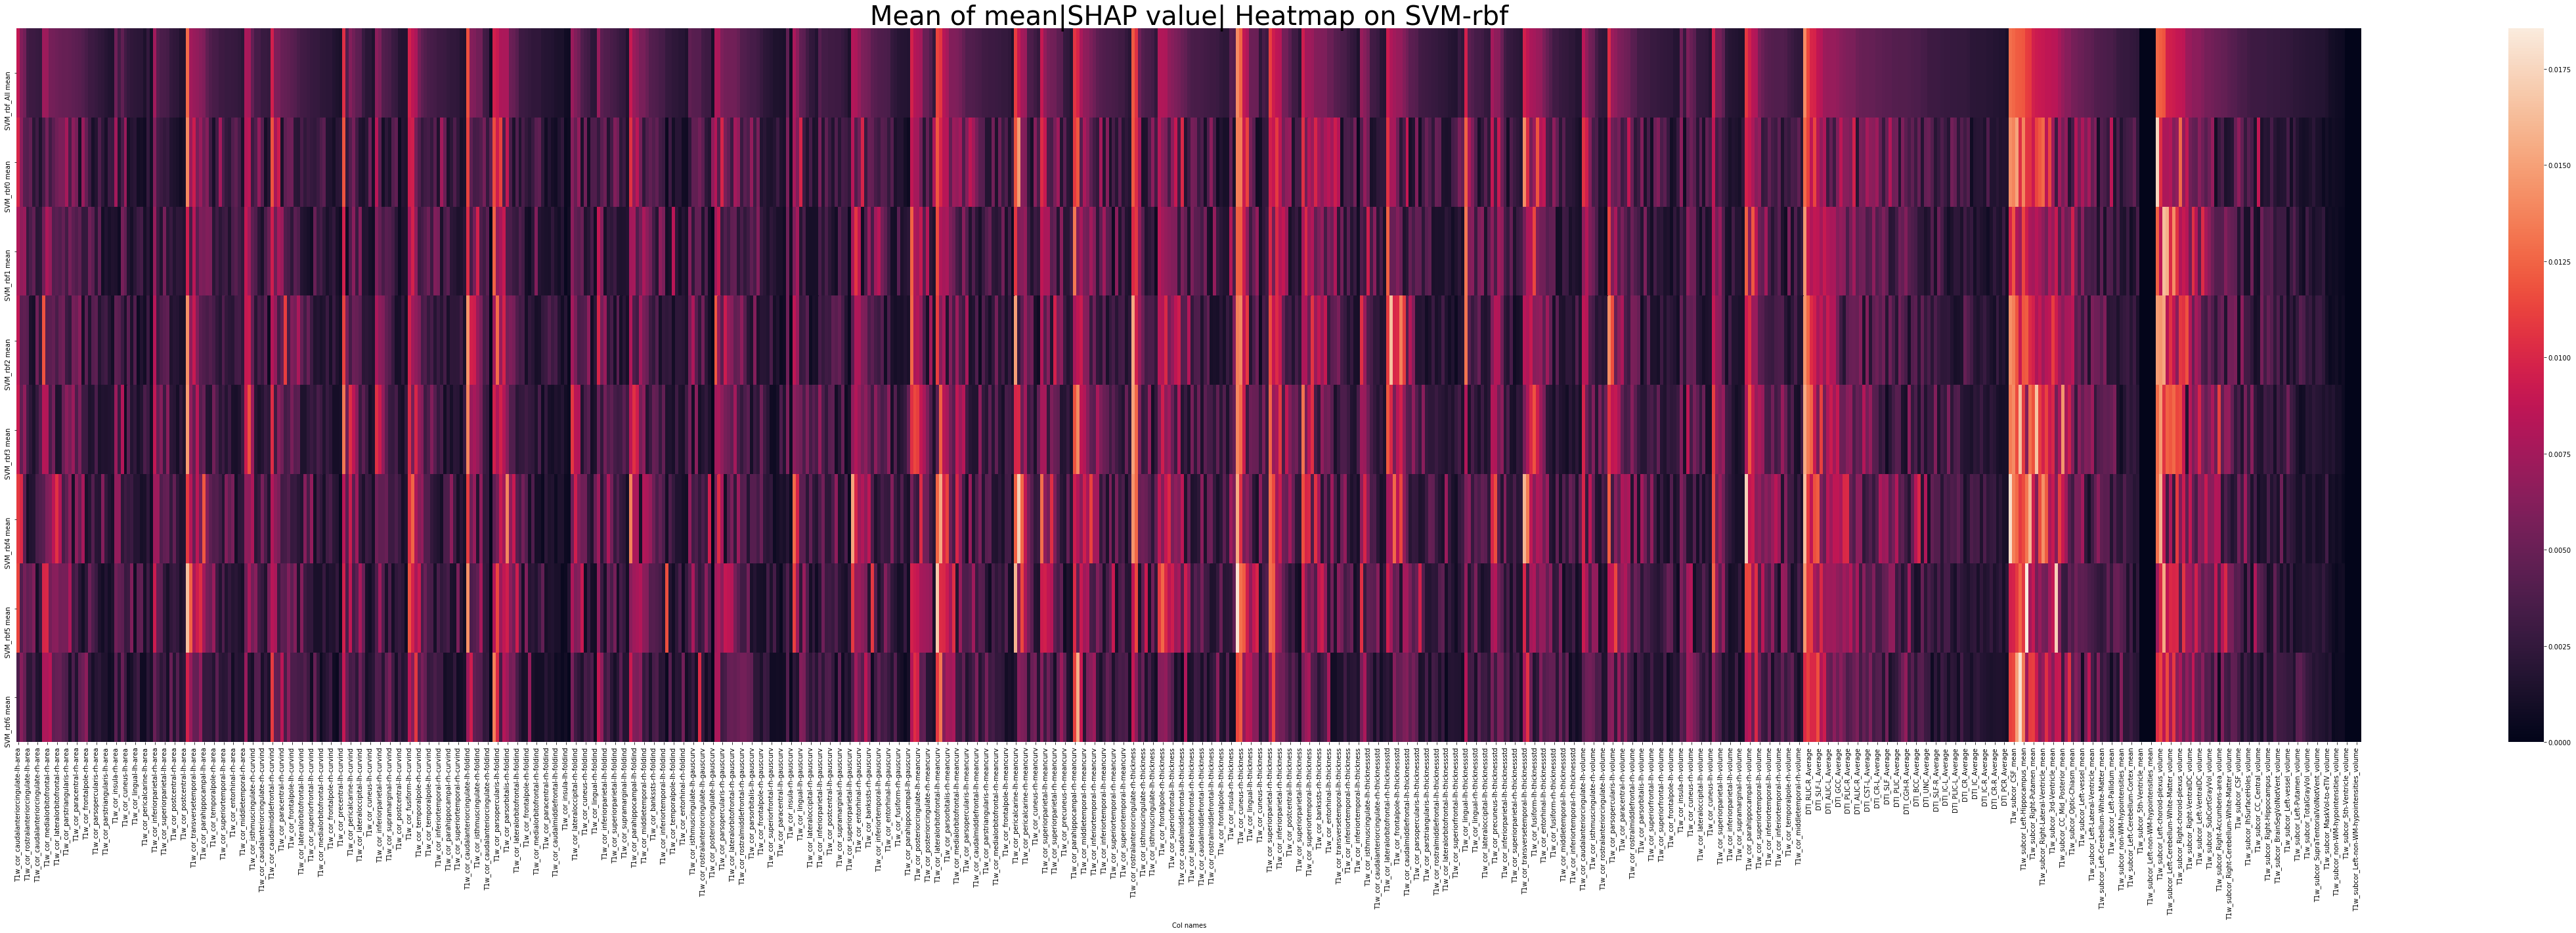

In [55]:
col = list(SHAP2.columns[63:64])+list(SHAP2.columns[21:28])
SHAP2 = SHAP2[col]
SHAP_T = SHAP2.transpose()
ax = sns.heatmap(SHAP_T)

plt.title('Mean of mean|SHAP value| Heatmap on SVM-rbf', fontsize=40)
plt.savefig('figures/Heatmap_SHAP_value_SVM_rbf.pdf')
plt.show()

In [56]:
# plt.pcolor(SHAP_T)
# plt.title('Heatmap of Feature importance', fontsize=20)
# plt.colorbar()

<b> Sorted by region specific </b>

In [57]:
SHAP2 = SHAP.sort_values(by=['Type','Lobe Region','SVM_rbf_All mean'],
                         ascending=[True,True,False])

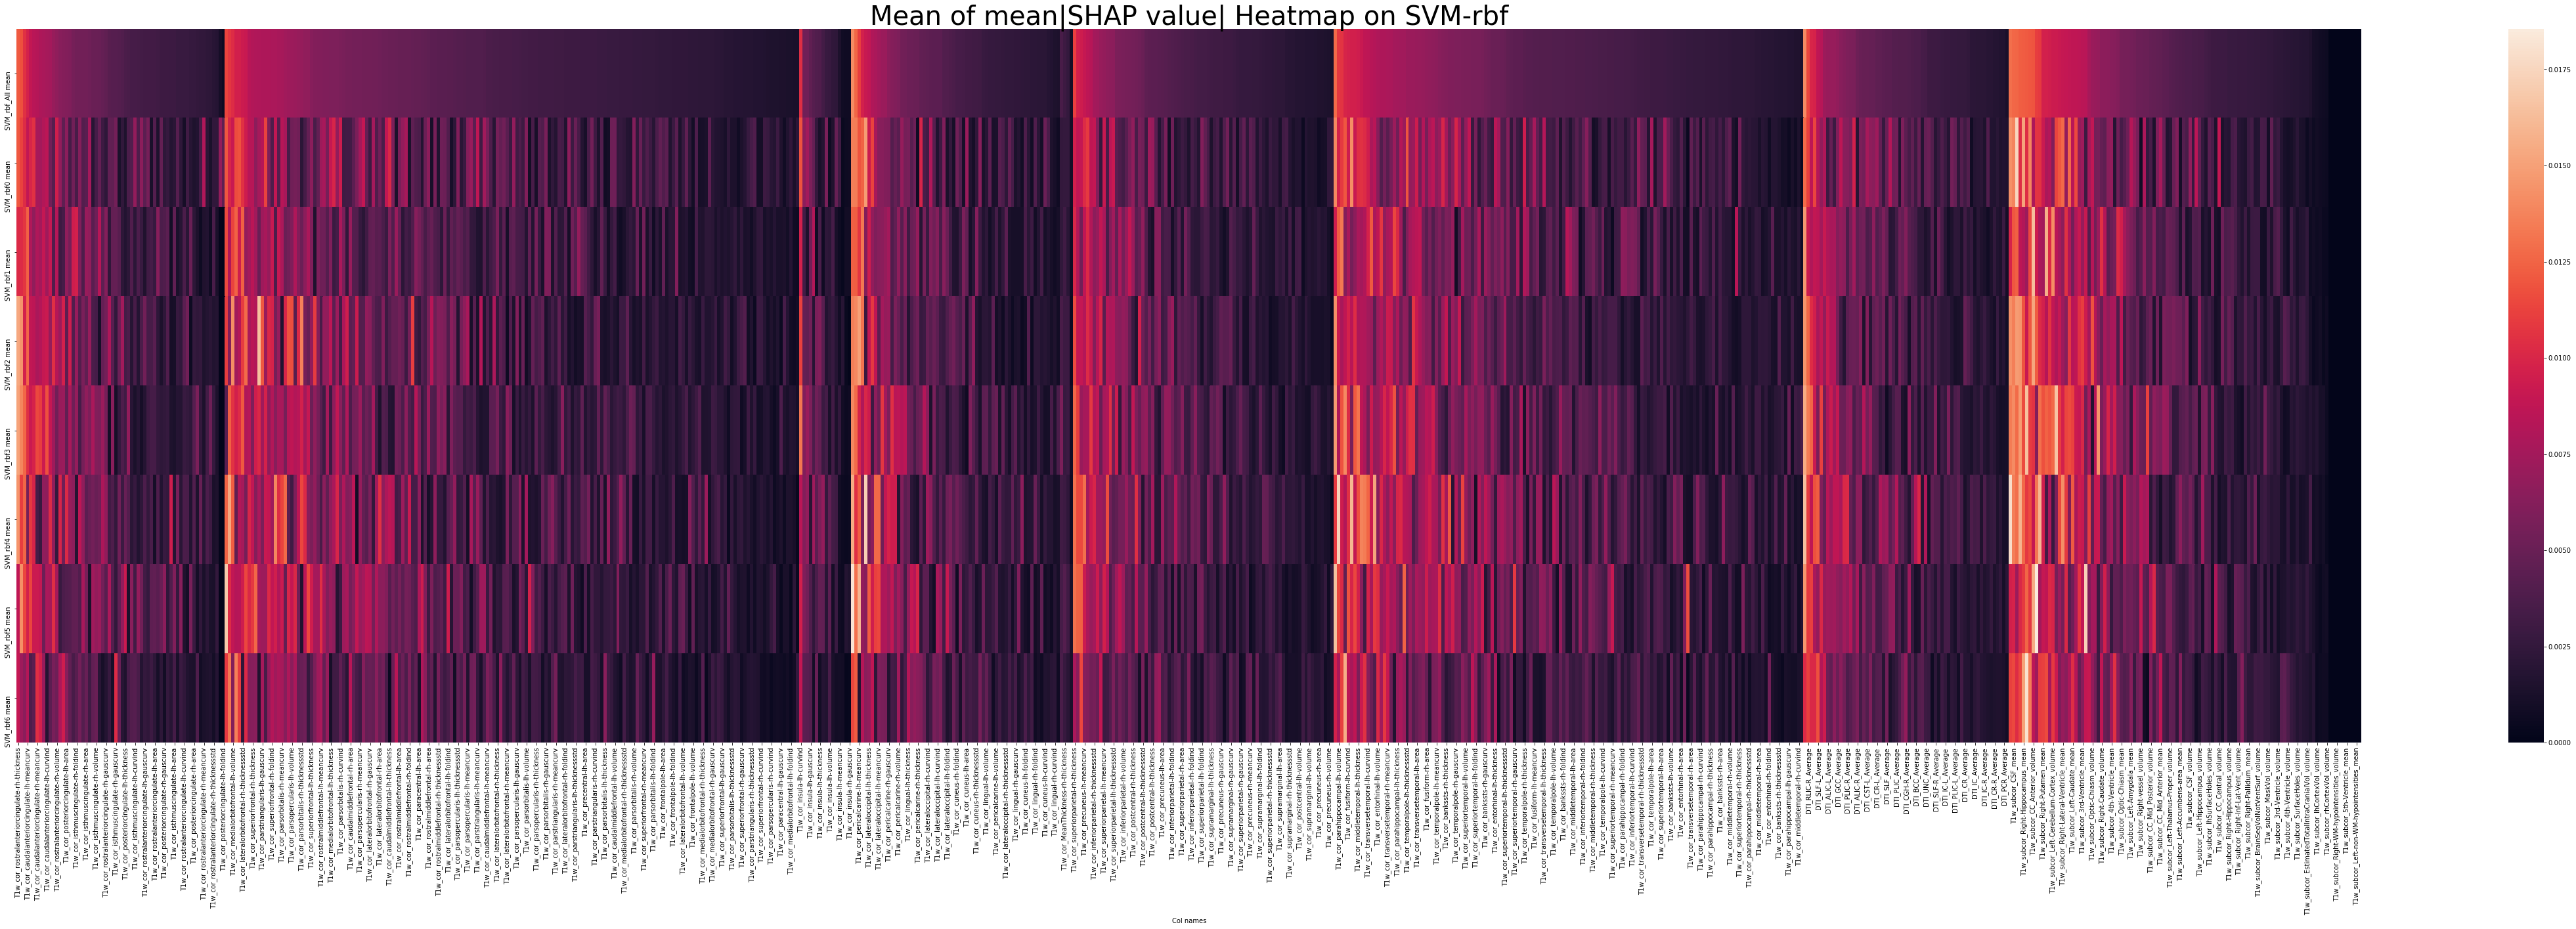

In [58]:
SHAP2 = SHAP2.set_index('Col names')
col = list(SHAP2.columns[63:64])+list(SHAP2.columns[21:28])
SHAP2 = SHAP2[col]
SHAP_T = SHAP2.transpose()
ax = sns.heatmap(SHAP_T)
plt.title('Mean of mean|SHAP value| Heatmap on SVM-rbf', fontsize=40)
plt.savefig('figures/Heatmap_SHAP_region_SVM_rbf.pdf')

In [59]:
# SHAP_T.style.background_gradient(cmap='Blues')

In [60]:
SHAP_SVM_rbf_T = SHAP_T.iloc[0:1]
SHAP_SVM_rbf_T = SHAP_SVM_rbf_T.astype('float')

Text(0.5, 1.0, 'Heatmap of mean|SHAP value| on SVM-rbf')

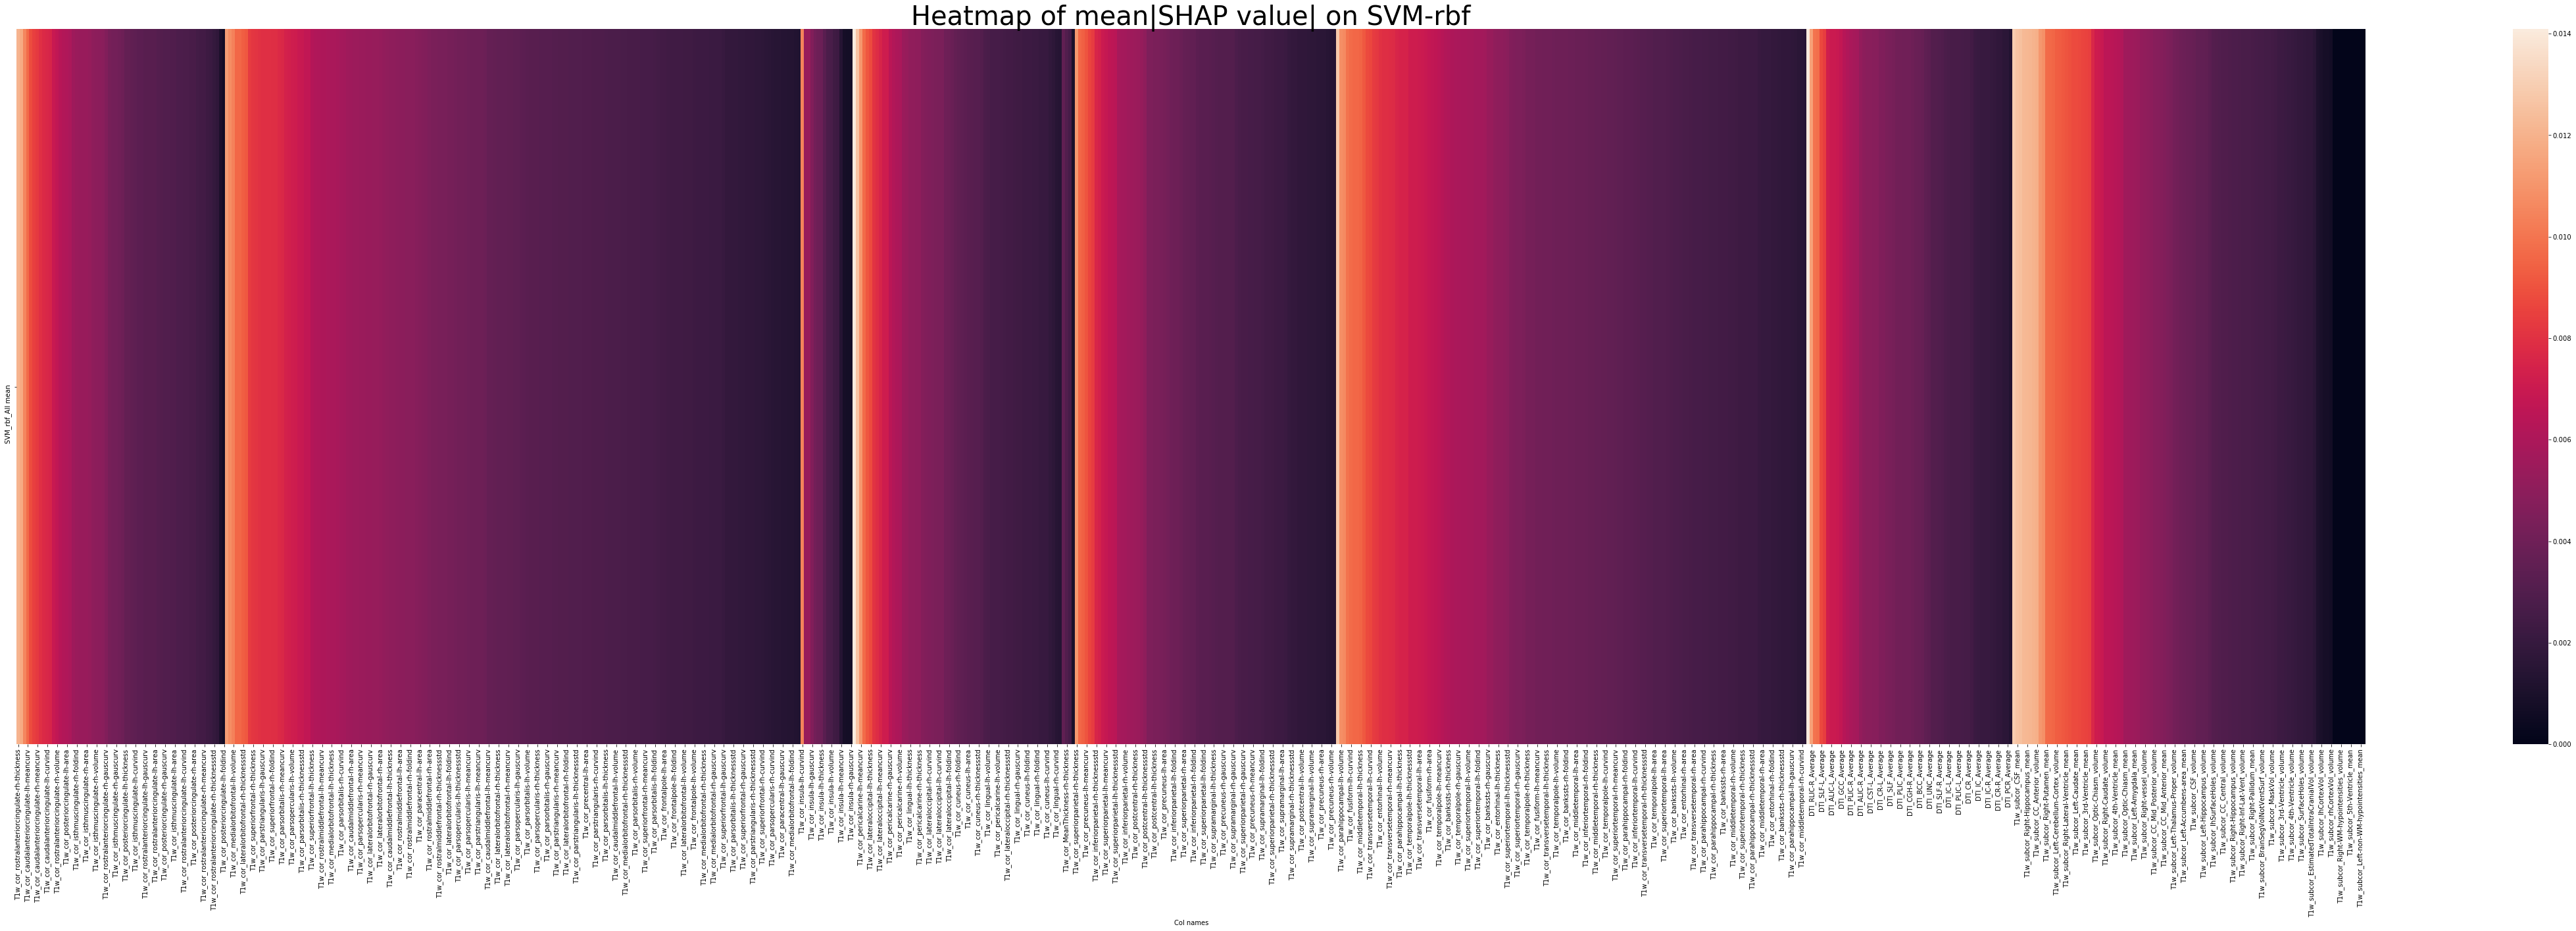

In [61]:
ax = sns.heatmap(SHAP_SVM_rbf_T)
plt.title('Heatmap of mean|SHAP value| on SVM-rbf', fontsize=40)
# plt.savefig('figures/Heatmap_SHAP_SVM_rbf.pdf')

In [62]:
# SHAP_SVM_rbf_T.style.background_gradient(cmap='Blues')

<b> SVM rbf: ['SVM_rbf_All mean] </b>

In [63]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [64]:
SHAP4 = SHAP.sort_values(by=['SVM_rbf_All mean'],
                         ascending=[False])
SVM = SHAP4[['SVM_rbf0 mean','SVM_rbf1 mean','SVM_rbf2 mean','SVM_rbf3 mean',
             'SVM_rbf4 mean','SVM_rbf5 mean','SVM_rbf6 mean','SVM_rbf_All mean']]#,'Col names']]
SVM2 = SVM.reset_index(drop=True)

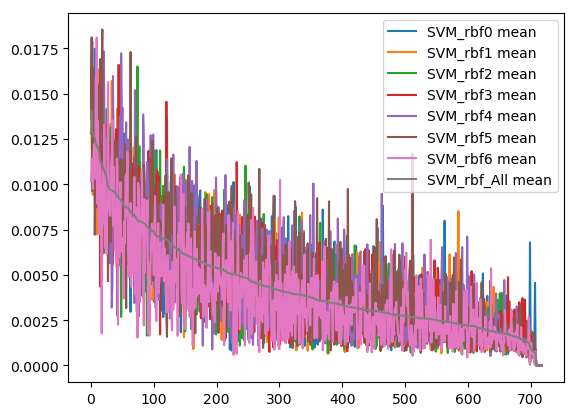

In [65]:
SVM2[SVM2.columns[0:8]].plot()

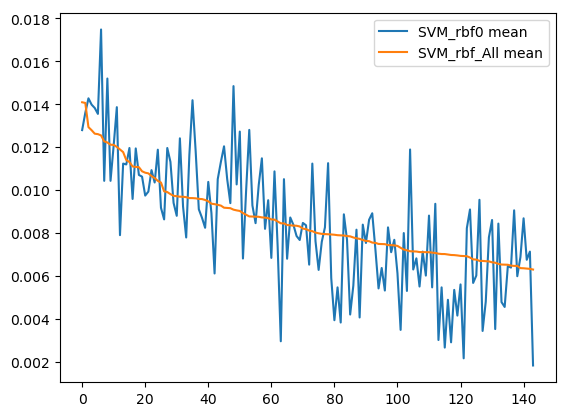

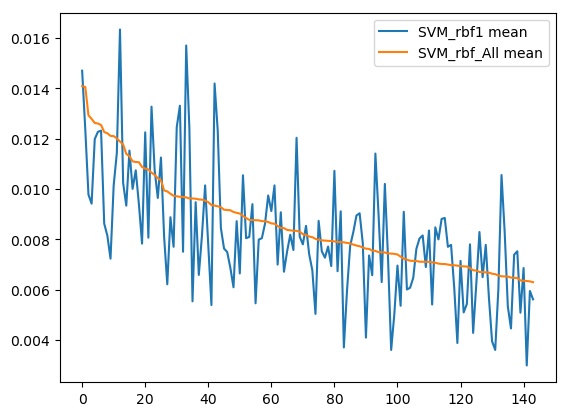

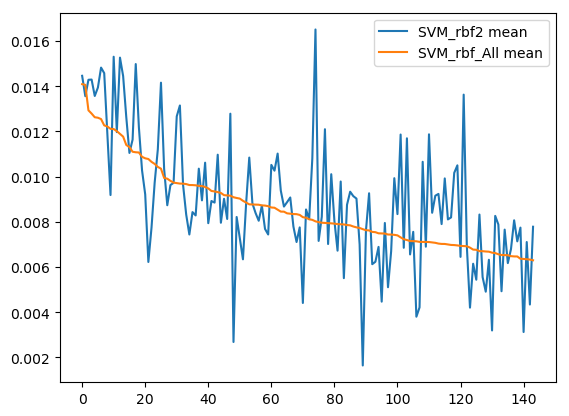

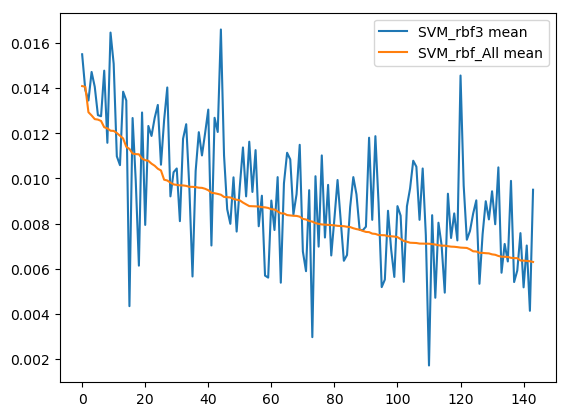

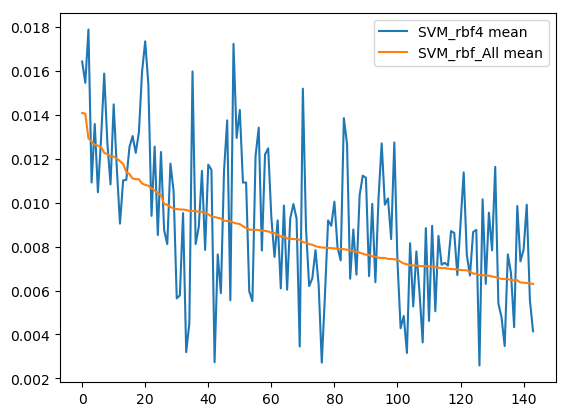

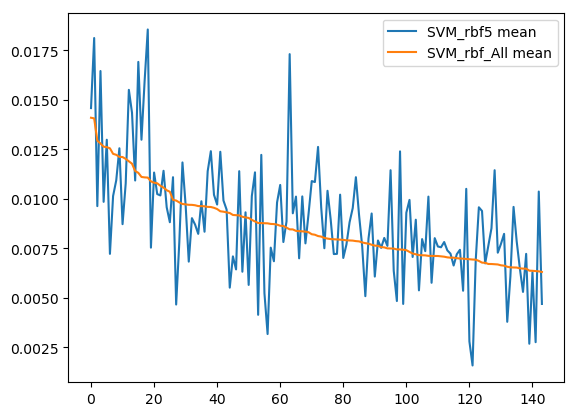

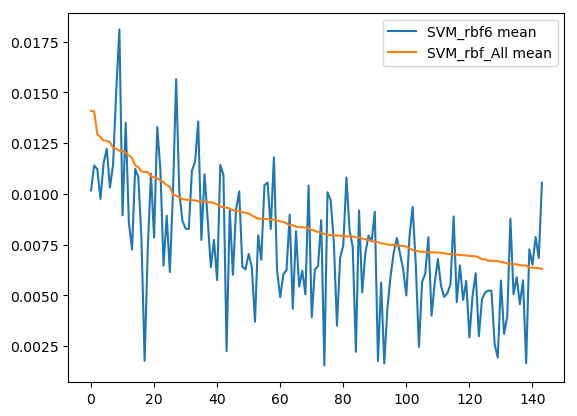

In [66]:
SVM2[list(SVM2.columns[0:1])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[1:2])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[2:3])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[3:4])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[4:5])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[5:6])+list(SVM2.columns[7:8])].loc[:143].plot()
SVM2[list(SVM2.columns[6:7])+list(SVM2.columns[7:8])].loc[:143].plot()

### 4.1.7. Clustering the Feature importance in SVM-rbf

<b> Holdout feature clustering using SHAP</b>

In [22]:
with open('explainers/holdout_clustering.sav', 'rb') as fp:
    load_clustering = pickle.load(fp)

In [23]:
with open('explainers/SVM-rbf0_multi.sav', 'rb') as fp:
    load_shap_values = pickle.load(fp)

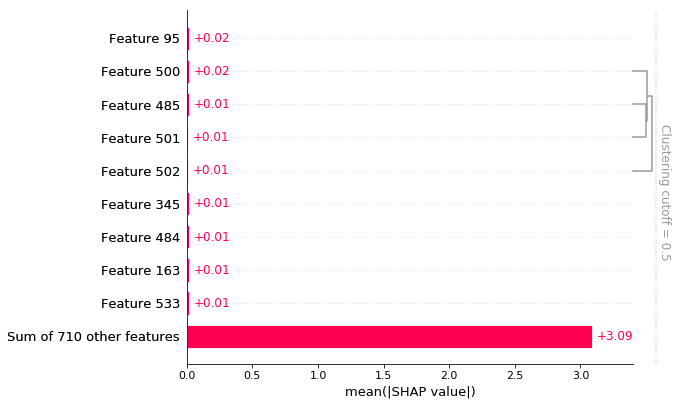

In [24]:
shap.plots.bar(load_shap_values, clustering=load_clustering)

<b> Clustering feature using Seaborn

(to do)

## 4.2. SHAP in Brain

### 4.2.1. Using FSL and Nilearn

<b> ROI 01: Visualization in MNI template

In [ ]:
from nilearn import plotting
# https://nilearn.github.io/modules/generated/nilearn.plotting.plot_roi.html#nilearn.plotting.plot_roi

In [ ]:
svm_result = '/ritter/share/jihoon/imagen_ml/posthoc_analysis/svmrbf0.nii.gz'
stat_img = "/ritter/share/data/IMAGEN/IMAGEN_prep-brainmask_BIDS/sub-000001123104/FU3/anat/sub-000001123104_ses-FU3_fs-brainmask_T1w_warped.nii.gz"

In [ ]:
view = plotting.view_img(svm_result)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

In [ ]:
plotting.plot_roi(stat_img, cmap='Paired')

In [ ]:
view = plotting.view_img(svm_result, bg_img=stat_img)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

In [ ]:
plotting.plot_roi(svm_result, bg_img=stat_img, cmap='Paired')

<b> appendix: Surface

In [ ]:
from nilearn import plotting

In [ ]:
# https://nilearn.github.io/modules/generated/nilearn.plotting.view_img_on_surf.html

In [ ]:
view = plotting.view_img_on_surf(stat_img, threshold='90%')
# view.open_in_browser()

view

In [ ]:
# Retrieve destrieux parcellation in fsaverage5 space from nilearn
from nilearn import datasets

destrieux_atlas = datasets.fetch_atlas_surf_destrieux()

# The parcellation is already loaded into memory
parcellation = destrieux_atlas['map_left']

# Retrieve fsaverage5 surface dataset for the plotting background. It contains
# the surface template as pial and inflated version and a sulcal depth maps
# which is used for shading
fsaverage = datasets.fetch_surf_fsaverage()

# The fsaverage dataset contains file names pointing to the file locations
print('Fsaverage5 pial surface of left hemisphere is at: %s' %
      fsaverage['pial_left'])
print('Fsaverage5 inflated surface of left hemisphere is at: %s' %
      fsaverage['infl_left'])
print('Fsaverage5 sulcal depth map of left hemisphere is at: %s' %
      fsaverage['sulc_left'])

In [ ]:
fsaverage

In [ ]:
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.5)

### 4.2.2. Using FreeSurfer and Nilearn